# Excel Report Automation 

A common task asked of analysts early on in their career is to keep updating certain excel reports. While important, it can become tedious and boring. This course is meant to teach the skill of automatically writing excel reports to save time.

To get started, one needs the to have a Data folder with the relevant data sources (which can be downloaded from the FinanceAndPython.com github repository).

## Treasury Curve Data Introduction

The treasury curve is a curve of yields that different treasury instruments yield at any point in time. This data has been sourced from FRED and we will use it to create part of our economic dashboard. The first thing we are going to do is actually read in the data and do some simple parsing on it.

This lesson is not going to use any excel reporting quite yet, but it is essential to understand this part of the workflow as the data prep is just as important as the actual automation of excel writing, and some might even say more important.

In [1]:
import pandas as pd

# Import the data, index column is the first column
yield_curve = pd.read_csv("Data/Yield Curve.csv", index_col=0)

# Convert the index column to be a datetime object
yield_curve.index = pd.to_datetime(yield_curve.index)

print(yield_curve)

            1 Mo  2 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  \
Date                                                                      
1990-01-02   NaN   NaN  7.83  7.89  7.81  7.87  7.90  7.87  7.98   7.94   
1990-01-03   NaN   NaN  7.89  7.94  7.85  7.94  7.96  7.92  8.04   7.99   
1990-01-04   NaN   NaN  7.84  7.90  7.82  7.92  7.93  7.91  8.02   7.98   
1990-01-05   NaN   NaN  7.79  7.85  7.79  7.90  7.94  7.92  8.03   7.99   
1990-01-08   NaN   NaN  7.79  7.88  7.81  7.90  7.95  7.92  8.05   8.02   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
2020-03-12  0.41  0.33  0.33  0.37  0.39  0.50  0.58  0.66  0.82   0.88   
2020-03-13  0.33  0.30  0.28  0.38  0.38  0.49  0.58  0.70  0.89   0.94   
2020-03-16  0.25  0.25  0.24  0.29  0.29  0.36  0.43  0.49  0.67   0.73   
2020-03-17  0.12  0.18  0.19  0.24  0.30  0.47  0.54  0.66  0.91   1.02   
2020-03-18  0.04  0.03  0.02  0.08  0.21  0.54  0.66  0.79  1.08   1.18   

            20 Yr  30 Yr

For working with this data, we do not need the 2 month yield and we also want to get rid of any dates which have null values

In [2]:
# Get rid of the 2 month rate
yield_curve = yield_curve.drop(columns="2 Mo")

# Drop any dates that don't have all yields
yield_curve = yield_curve.dropna()
print(yield_curve)

            1 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  20 Yr  \
Date                                                                       
2001-07-31  3.67  3.54  3.47  3.53  3.79  4.06  4.57  4.86   5.07   5.61   
2001-08-01  3.65  3.53  3.47  3.56  3.83  4.09  4.62  4.90   5.11   5.63   
2001-08-02  3.65  3.53  3.46  3.57  3.89  4.17  4.69  4.97   5.17   5.68   
2001-08-03  3.63  3.52  3.47  3.57  3.91  4.22  4.72  4.99   5.20   5.70   
2001-08-06  3.62  3.52  3.47  3.56  3.88  4.17  4.71  4.99   5.19   5.70   
...          ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
2020-03-12  0.41  0.33  0.37  0.39  0.50  0.58  0.66  0.82   0.88   1.27   
2020-03-13  0.33  0.28  0.38  0.38  0.49  0.58  0.70  0.89   0.94   1.31   
2020-03-16  0.25  0.24  0.29  0.29  0.36  0.43  0.49  0.67   0.73   1.10   
2020-03-17  0.12  0.19  0.24  0.30  0.47  0.54  0.66  0.91   1.02   1.45   
2020-03-18  0.04  0.02  0.08  0.21  0.54  0.66  0.79  1.08   1.18   1.60   

           

Now that we have some simple data processing done, let's check out the yield curve at a certain date.

In [3]:
# Inspect a given date's yield curve
print(yield_curve.loc["2018-12-31"])

1 Mo     2.44
3 Mo     2.45
6 Mo     2.56
1 Yr     2.63
2 Yr     2.48
3 Yr     2.46
5 Yr     2.51
7 Yr     2.59
10 Yr    2.69
20 Yr    2.87
30 Yr    3.02
Name: 2018-12-31 00:00:00, dtype: float64


For comparing dates, we could start by looking at what the end of 2019 looks like versus the end of 2018. We go through all the different data processing steps below.

In [4]:
# Index into the two dates and copy
yield_table = yield_curve.loc[["2019-12-31", "2018-12-31"]].copy()
print(yield_table)

            1 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  20 Yr  \
Date                                                                       
2019-12-31  1.48  1.55  1.60  1.59  1.58  1.62  1.69  1.83   1.92   2.25   
2018-12-31  2.44  2.45  2.56  2.63  2.48  2.46  2.51  2.59   2.69   2.87   

            30 Yr  
Date               
2019-12-31   2.39  
2018-12-31   3.02  


In [5]:
# Transpose the table
yield_table = yield_table.T
print(yield_table)

Date   2019-12-31  2018-12-31
1 Mo         1.48        2.44
3 Mo         1.55        2.45
6 Mo         1.60        2.56
1 Yr         1.59        2.63
2 Yr         1.58        2.48
3 Yr         1.62        2.46
5 Yr         1.69        2.51
7 Yr         1.83        2.59
10 Yr        1.92        2.69
20 Yr        2.25        2.87
30 Yr        2.39        3.02


In [6]:
# Rename the columns
yield_table.columns = ["Current", "1 Year Ago"]
print(yield_table)

       Current  1 Year Ago
1 Mo      1.48        2.44
3 Mo      1.55        2.45
6 Mo      1.60        2.56
1 Yr      1.59        2.63
2 Yr      1.58        2.48
3 Yr      1.62        2.46
5 Yr      1.69        2.51
7 Yr      1.83        2.59
10 Yr     1.92        2.69
20 Yr     2.25        2.87
30 Yr     2.39        3.02


In [7]:
# Add in a column for the change in the rate
yield_table["Change"] = yield_table["Current"] -  yield_table["1 Year Ago"]
print(yield_table)

       Current  1 Year Ago  Change
1 Mo      1.48        2.44   -0.96
3 Mo      1.55        2.45   -0.90
6 Mo      1.60        2.56   -0.96
1 Yr      1.59        2.63   -1.04
2 Yr      1.58        2.48   -0.90
3 Yr      1.62        2.46   -0.84
5 Yr      1.69        2.51   -0.82
7 Yr      1.83        2.59   -0.76
10 Yr     1.92        2.69   -0.77
20 Yr     2.25        2.87   -0.62
30 Yr     2.39        3.02   -0.63


## Handling Dates

There are a few date aspects to take care of with the data going forward. One nice property of datetimes is we can replace a component such as the year. This will not make the change in place, however.

In [8]:
from datetime import datetime

# Create an example date
test = datetime(2019,12,31)
print(test)

# Replace the year with 2018
print(test.replace(year=2018))

# But it will not change the element, it will actually return it so the variable test stays the same
print(test.year)

2019-12-31 00:00:00
2018-12-31 00:00:00
2019


Below is an example of how we can have a first date, then also have the date for the year before.

In [9]:
# Create the first date
date1 = datetime(2019, 12, 31)

# Find the date for the year prior
date2 = date1.replace(year=date1.year-1)

# Print the yield curves at the date
print(yield_curve.loc[date1])
print()
print()
print(yield_curve.loc[date2])

1 Mo     1.48
3 Mo     1.55
6 Mo     1.60
1 Yr     1.59
2 Yr     1.58
3 Yr     1.62
5 Yr     1.69
7 Yr     1.83
10 Yr    1.92
20 Yr    2.25
30 Yr    2.39
Name: 2019-12-31 00:00:00, dtype: float64


1 Mo     2.44
3 Mo     2.45
6 Mo     2.56
1 Yr     2.63
2 Yr     2.48
3 Yr     2.46
5 Yr     2.51
7 Yr     2.59
10 Yr    2.69
20 Yr    2.87
30 Yr    3.02
Name: 2018-12-31 00:00:00, dtype: float64


One issue when working with data that is based on trading schedules is that we can run into an issue where a date we need is missing. For example, if we take the year prior version of a date, there is a chance that it could have been on a weekend the year before.

In [10]:
# Below is an example of how an error could be thrown

# Create the first date
date1 = datetime(2019, 12, 30)

# Find the date for the year prior
date2 = date1.replace(year=date1.year-1)

print(yield_curve.loc[date1])
print()
print()
print(yield_curve.loc[date2])



1 Mo     1.51
3 Mo     1.57
6 Mo     1.60
1 Yr     1.57
2 Yr     1.58
3 Yr     1.59
5 Yr     1.68
7 Yr     1.81
10 Yr    1.90
20 Yr    2.21
30 Yr    2.34
Name: 2019-12-30 00:00:00, dtype: float64




KeyError: datetime.datetime(2018, 12, 30, 0, 0)

The way that we will approach this issue is the following:

1. Create a daily date range between the minimum and maximum of the yield curve dates
2. Reindex the yield curve data with the new range
3. Fill in the null values

For the first step, we use pd.date_range which will return the daily dates between a start and end date

In [11]:
# Find the start and end of the yield_curve dates
date1 = yield_curve.index.min()
date2 = yield_curve.index.max()

date_range = pd.date_range(date1, date2)
print(date_range)

DatetimeIndex(['2001-07-31', '2001-08-01', '2001-08-02', '2001-08-03',
               '2001-08-04', '2001-08-05', '2001-08-06', '2001-08-07',
               '2001-08-08', '2001-08-09',
               ...
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18'],
              dtype='datetime64[ns]', length=6806, freq='D')


For the second step, we use reindex for the yield_curve and this will change the index to be what we pass in. If there are not values present for a certain index, they get filled in with null.

In [12]:
# Re-index the yield curve
yield_curve = yield_curve.reindex(index = date_range)
print(yield_curve)

            1 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  20 Yr  \
2001-07-31  3.67  3.54  3.47  3.53  3.79  4.06  4.57  4.86   5.07   5.61   
2001-08-01  3.65  3.53  3.47  3.56  3.83  4.09  4.62  4.90   5.11   5.63   
2001-08-02  3.65  3.53  3.46  3.57  3.89  4.17  4.69  4.97   5.17   5.68   
2001-08-03  3.63  3.52  3.47  3.57  3.91  4.22  4.72  4.99   5.20   5.70   
2001-08-04   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   
...          ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
2020-03-14   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   
2020-03-15   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   
2020-03-16  0.25  0.24  0.29  0.29  0.36  0.43  0.49  0.67   0.73   1.10   
2020-03-17  0.12  0.19  0.24  0.30  0.47  0.54  0.66  0.91   1.02   1.45   
2020-03-18  0.04  0.02  0.08  0.21  0.54  0.66  0.79  1.08   1.18   1.60   

            30 Yr  
2001-07-31   5.51  
2001-08-01   5.53  
2001-08-02   5.57  
2001-08

To fill in the null values, we are going to employ the fillna function and pass it the method of ffill which means to fill values forward. This will mean that the values of yesterday will be pushed forward to fill in dates with null values.

In [13]:
# Fill null values
yield_curve = yield_curve.fillna(method='ffill')
print(yield_curve)

            1 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  20 Yr  \
2001-07-31  3.67  3.54  3.47  3.53  3.79  4.06  4.57  4.86   5.07   5.61   
2001-08-01  3.65  3.53  3.47  3.56  3.83  4.09  4.62  4.90   5.11   5.63   
2001-08-02  3.65  3.53  3.46  3.57  3.89  4.17  4.69  4.97   5.17   5.68   
2001-08-03  3.63  3.52  3.47  3.57  3.91  4.22  4.72  4.99   5.20   5.70   
2001-08-04  3.63  3.52  3.47  3.57  3.91  4.22  4.72  4.99   5.20   5.70   
...          ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
2020-03-14  0.33  0.28  0.38  0.38  0.49  0.58  0.70  0.89   0.94   1.31   
2020-03-15  0.33  0.28  0.38  0.38  0.49  0.58  0.70  0.89   0.94   1.31   
2020-03-16  0.25  0.24  0.29  0.29  0.36  0.43  0.49  0.67   0.73   1.10   
2020-03-17  0.12  0.19  0.24  0.30  0.47  0.54  0.66  0.91   1.02   1.45   
2020-03-18  0.04  0.02  0.08  0.21  0.54  0.66  0.79  1.08   1.18   1.60   

            30 Yr  
2001-07-31   5.51  
2001-08-01   5.53  
2001-08-02   5.57  
2001-08

## Yield Table Creation

What we want to do now is create a function which will take a given date and build a table which has the current date's yield curve, the yield curve from 1 year ago from that date, and the yield curve from 5 years ago. We also want to grab the change in rates over the two periods.

In [14]:
from pandas import DataFrame

# Write and test the function

def create_yield_table(data: DataFrame, date: datetime) -> DataFrame:
    """
    Function to build a yield table object

    Parameters
    ----------
    data : DataFrame
        Yield curve data to be used
    date : datetime
        The date to use for the current date

    Yields
    ------
    DataFrame
        A yield table

    """
    # Find the other two dates
    date2 = date.replace(year=date.year-1)
    date3 = date.replace(year=date.year-5)

    # Index into the three dates and copy
    table = yield_curve.loc[[date, date2, date3]].copy()

    # Transpose
    table = table.T

    # Rename the columns
    table.columns = ["Current", "1 Year Ago Curve", "5 Years Ago Curve"]

    # Get the changes in the yield curve
    table["1 Year Change"] = table["Current"] - table["1 Year Ago Curve"]
    table["5 Year Change"] = table["Current"] - table["5 Years Ago Curve"]

    return table

yield_table = create_yield_table(yield_curve, datetime(2019,12,31))
print(yield_table)

       Current  1 Year Ago Curve  5 Years Ago Curve  1 Year Change  \
1 Mo      1.48              2.44               0.03          -0.96   
3 Mo      1.55              2.45               0.04          -0.90   
6 Mo      1.60              2.56               0.12          -0.96   
1 Yr      1.59              2.63               0.25          -1.04   
2 Yr      1.58              2.48               0.67          -0.90   
3 Yr      1.62              2.46               1.10          -0.84   
5 Yr      1.69              2.51               1.65          -0.82   
7 Yr      1.83              2.59               1.97          -0.76   
10 Yr     1.92              2.69               2.17          -0.77   
20 Yr     2.25              2.87               2.47          -0.62   
30 Yr     2.39              3.02               2.75          -0.63   

       5 Year Change  
1 Mo            1.45  
3 Mo            1.51  
6 Mo            1.48  
1 Yr            1.34  
2 Yr            0.91  
3 Yr            0.52 

### Re-indexing Columns

We used re-indexing before when we wanted to change the dates used in our data to include weekends. It is also possible to sue re-indexing on columns to change the order or add in columns not there. Below is an example of how we could re-organize the columns so that the change in the curves columns are next to their respective curve columns (i.e. 1 Year Change is next to 1 Year Ago Curve).

All that needs to be changed is to give an argument of columns followed by the re-index columns.

In [15]:
# Here you see how re-indexing can be done with columns
print(yield_table.reindex(columns=['Current', '1 Year Ago Curve','1 Year Change', '5 Years Ago Curve','5 Year Change']))

       Current  1 Year Ago Curve  1 Year Change  5 Years Ago Curve  \
1 Mo      1.48              2.44          -0.96               0.03   
3 Mo      1.55              2.45          -0.90               0.04   
6 Mo      1.60              2.56          -0.96               0.12   
1 Yr      1.59              2.63          -1.04               0.25   
2 Yr      1.58              2.48          -0.90               0.67   
3 Yr      1.62              2.46          -0.84               1.10   
5 Yr      1.69              2.51          -0.82               1.65   
7 Yr      1.83              2.59          -0.76               1.97   
10 Yr     1.92              2.69          -0.77               2.17   
20 Yr     2.25              2.87          -0.62               2.47   
30 Yr     2.39              3.02          -0.63               2.75   

       5 Year Change  
1 Mo            1.45  
3 Mo            1.51  
6 Mo            1.48  
1 Yr            1.34  
2 Yr            0.91  
3 Yr            0.52 

Let's add this feature into our function from before!

In [16]:
# Revise the code
def create_yield_table(data: DataFrame, date: datetime) -> DataFrame:
    """
    Function to build a yield table object

    Parameters
    ----------
    data : DataFrame
        Yield curve data to be used
    date : datetime
        The date to use for the current date

    Yields
    ------
    DataFrame
        A yield table

    """
    # Find the other two dates
    date2 = date.replace(year=date.year-1)
    date3 = date.replace(year=date.year-5)

    # Index into the three dates and copy
    table = yield_curve.loc[[date, date2, date3]].copy()

    # Transpose
    table = table.T

    # Rename the columns
    table.columns = ["Current", "1 Year Ago Curve", "5 Years Ago Curve"]

    # Get the changes in the yield curve
    table["1 Year Change"] = table["Current"] - table["1 Year Ago Curve"]
    table["5 Year Change"] = table["Current"] - table["5 Years Ago Curve"]
    
    # Re-index the columns
    table = table.reindex(columns=['Current', '1 Year Ago Curve','1 Year Change',
                                   '5 Years Ago Curve','5 Year Change'])

    return table

yield_table = create_yield_table(yield_curve, datetime(2019,12,31))
print(yield_table)

       Current  1 Year Ago Curve  1 Year Change  5 Years Ago Curve  \
1 Mo      1.48              2.44          -0.96               0.03   
3 Mo      1.55              2.45          -0.90               0.04   
6 Mo      1.60              2.56          -0.96               0.12   
1 Yr      1.59              2.63          -1.04               0.25   
2 Yr      1.58              2.48          -0.90               0.67   
3 Yr      1.62              2.46          -0.84               1.10   
5 Yr      1.69              2.51          -0.82               1.65   
7 Yr      1.83              2.59          -0.76               1.97   
10 Yr     1.92              2.69          -0.77               2.17   
20 Yr     2.25              2.87          -0.62               2.47   
30 Yr     2.39              3.02          -0.63               2.75   

       5 Year Change  
1 Mo            1.45  
3 Mo            1.51  
6 Mo            1.48  
1 Yr            1.34  
2 Yr            0.91  
3 Yr            0.52 

## Visualization

With our data finalized, we move on to graphing the actual data.

In [17]:
# Grab some of the data to play with
graph_data = yield_table[['Current', '1 Year Ago Curve', '5 Years Ago Curve']].copy()

### Converting the Index

Our index right now is in the form of strings that we are able to read, but our code will not understand right away. To make it so that it can be properly graphed, we want to build out a function that given a string can convert it to what number of years it is (including being a fraction of a year).

We will look for whether the string has Mo for month in it, or Yr for year in it, then map the remaining numerical value to either a value for the year or a value divided by 12 for a fraction of a year in the case of months.

In [18]:
def convert_to_year_frac(label: str) -> float:
    """
    Function to convert treasury curve indices to floating
    point numbers

    Parameters
    ----------
    label : str
        The string index label.

    Returns
    -------
    float
        A floating point number representing a fraction of a year.

    """
    
    # Handle months
    if "Mo" in label:
        # Get rid of string part
        frac = label.replace(' Mo','')
        
        # Convert to a fraction over 12
        frac = float(frac)
        frac = frac/12
    # Handle years
    else:
        # Get rid of string part
        frac = label.replace(' Yr','')
        # Convert to floating point number
        frac = float(frac)
    
    return frac

print(convert_to_year_frac('1 Mo'))

0.08333333333333333


Pandas indices can be modified by calling map and passing a function to map over each index. For example, below we see how that could be done with the function we just created.

In [19]:
# We can use map to map a function on to the index
print(graph_data.index.map(convert_to_year_frac))

Float64Index([0.08333333333333333, 0.25, 0.5, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0,
              20.0, 30.0],
             dtype='float64')


In [20]:
# Set the index to this new one
graph_data.index = graph_data.index.map(convert_to_year_frac)
print(graph_data)

           Current  1 Year Ago Curve  5 Years Ago Curve
0.083333      1.48              2.44               0.03
0.250000      1.55              2.45               0.04
0.500000      1.60              2.56               0.12
1.000000      1.59              2.63               0.25
2.000000      1.58              2.48               0.67
3.000000      1.62              2.46               1.10
5.000000      1.69              2.51               1.65
7.000000      1.83              2.59               1.97
10.000000     1.92              2.69               2.17
20.000000     2.25              2.87               2.47
30.000000     2.39              3.02               2.75


Now to plot the data we employ matplotlib and begin the basic plotting.

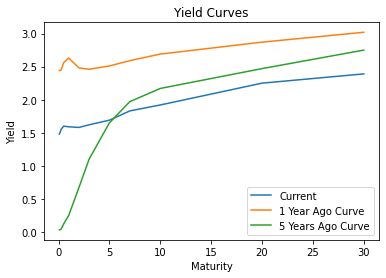

In [21]:
import matplotlib.pyplot as plt

# Plot
graph_data.plot(kind="line")

# Add labels
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Yield Curves")

plt.show()

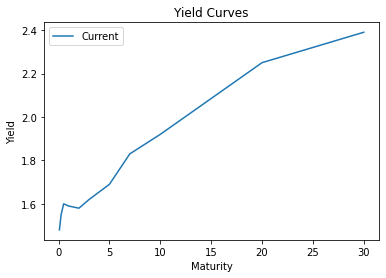

In [22]:
# Let's see what just the current would look like

# Plot
graph_data[["Current"]].plot(kind="line")

# Add labels
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Yield Curves")

plt.show()

### Axis Limits

Sometimes, it can be a matter of preference to use a different axis limit when plotting. Matplotlib allows you to modify these through plt.ylim() for the y limits and naturally plt.xlim() for the x limits.

Calling it without an argument will return the current limits, and passing a tuple/list of length two will set the bottom and top limits with the values passed.

(1.4344999999999999, 2.4355)


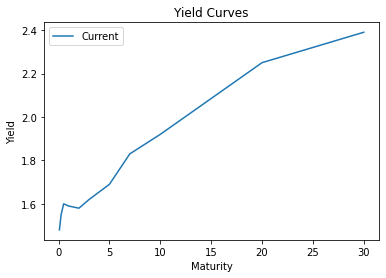

In [23]:
# An example of grabbing the current limits

# Plot
graph_data[["Current"]].plot(kind="line")

# Set labels
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Yield Curves")

# Find the current y limits
print(plt.ylim())

plt.show()

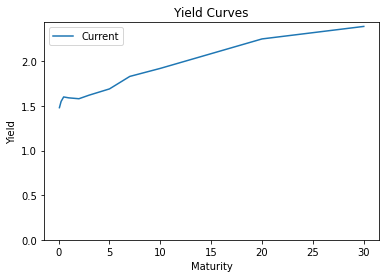

In [24]:
#By passing plt.ylim() a set of limits to use, we can set the boundaries

# Plot the data
graph_data[["Current"]].plot(kind="line")

# Get the current limit
current_lim = plt.ylim()

#Set the new limits so that it is 0 at the bottom, and the same limit on the top
new_lim = [0,current_lim[1]]
plt.ylim(new_lim)

# Set the labels
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Yield Curves")

plt.show()

### Setting the Ticks

Our current graph is shaping up, but one problem is that the ticks are in nominal values but they are yields so they should really be percentages. We have the ability to modify this as well.

We have to get back the axis from plotting and then we can set the major formatter in this way. If we take PercentFormatter from matplotlib.ticker, we can pass it in to ax.yaxis.set_major_formatter and this will tell our plot that the y axis is going to be formatted into percents.

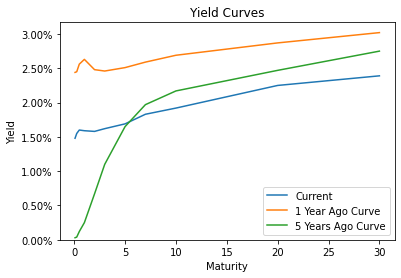

In [25]:
from matplotlib.ticker import PercentFormatter

# When we plot in this way we can return the axis
ax = graph_data.plot(kind="line")

# Get the current limit and set the limit to have 0 on the bottom
current_lim = plt.ylim()
new_lim = [0 ,current_lim[1]]
plt.ylim(new_lim)

# Set the labels
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Yield Curves")

# We can also set the plot formatter to one that converts numbers to percents
ax.yaxis.set_major_formatter(PercentFormatter())

plt.show()

### Creating Folder Structure

With the os library, we have the ability to create folder structures and move around files. By calling os.path.exists with a path, we can check if a folder exists (in this case we want to see if there is an Images and Tables folder in our current repository). By calling os.mkdir we can actually create a directory!

In [26]:
import os

#Using os, check if a folder exists and if not we can create the folder
if not os.path.exists("Images"):
    os.mkdir("Images")
if not os.path.exists("Tables"):
    os.mkdir("Tables")

We want to save down the csv file for the processed data we just finished up with.

In [27]:
# Save the table to a tables folder
yield_table.to_csv("Tables/Treasury Yield Table.csv")

We can also use plt.savefig to save a figure that we just created instead of showing it. We want to save down our image for later possible use.

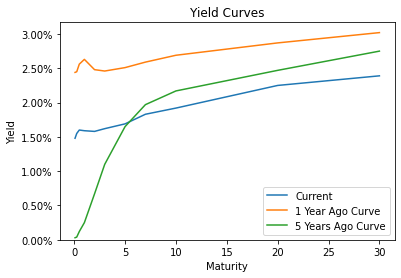

In [28]:
# Plot
ax = graph_data.plot(kind="line")

# Get the current limit and set the limit to have 0 on the bottom
current_lim = plt.ylim()
new_lim = [0 ,current_lim[1]]
plt.ylim(new_lim)

# Set the labels
plt.xlabel("Maturity")
plt.ylabel("Yield")
plt.title("Yield Curves")

# We can also set the plot formatter to one that converts numbers to percents
ax.yaxis.set_major_formatter(PercentFormatter())

# plt.savefig() will save a picture of a graph
plt.savefig("Images/Treasury Yield Curves.png")